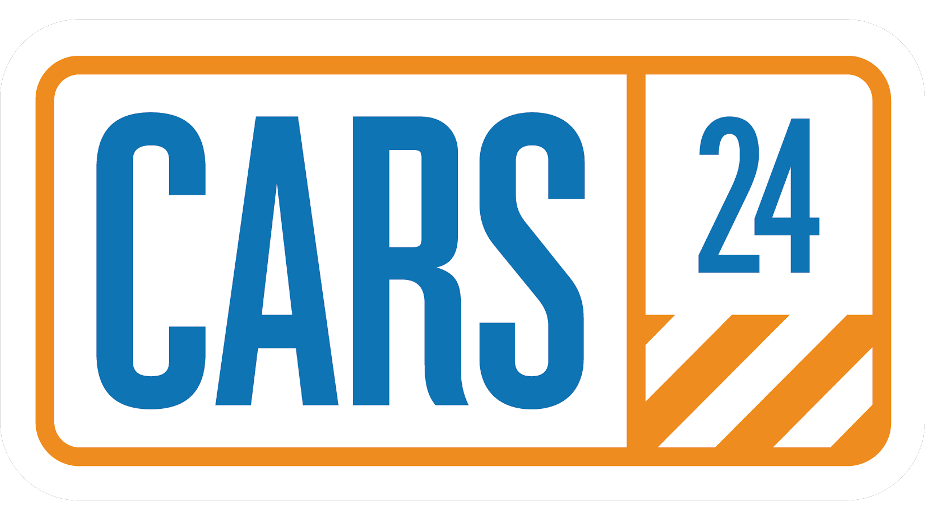

# Webscraping Project on [Cars24](https://www.cars24.com/)

## Project Author: Balaji Mummidi (  [LinkedIn](https://www.linkedin.com/in/balaji-mummidi/) ,[GitHub](https://github.com/MummidiBalaji), [Kaggle](https://www.kaggle.com/balajimummidi/account?isEditing=False) )

## Tools Used:


* BeautifulSoup, Selenium to read and  extract data from url.
* Pandas & NumPy for analysing the data.
* Seaborn, Matplotlib for visualising the data.

### Problem Statement: To analyze the the details of used cars based on different categories.

### Importing necessary libraries

In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
import re
import time
from datetime import datetime

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from selenium import webdriver

### Gathering cars data from website

##### Hyderabad City Cars

In [2]:
# For city Hyderabad
driver_H = webdriver.Chrome('C:\\Users\\MUMMIDI\\Downloads\\chromedriver.exe')
driver_H.get('https://www.cars24.com/buy-used-cars-hyderabad/?itm_source=Cars24Website&itm_medium=sticky_header')
ScrollNumber_H = 50
for i in range(1,ScrollNumber_H):
    driver_H.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_H = open('cars24_Hyderabad.html', 'w', encoding='utf-8')
file_H.write(driver_H.page_source)
file_H.close()
driver_H.close()

In [3]:
data_H = open('cars24_Hyderabad.html','r')
soup_H = BeautifulSoup(data_H, 'html.parser')

##### Delhi City Cars

In [4]:
# For New Delhi
driver_D = webdriver.Chrome('C:\\Users\\MUMMIDI\\Downloads\\chromedriver.exe')
driver_D.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2&pinId=110001')
ScrollNumber_D = 50
for i in range(1,ScrollNumber_D):
    driver_D.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_D = open('cars24_Delhi.html', 'w', encoding='utf-8')
file_D.write(driver_D.page_source)
file_D.close()
driver_D.close()

In [5]:
data_D = open('cars24_Delhi.html','r')
soup_D = BeautifulSoup(data_D, 'html.parser')

##### Mumbai City Cars

In [6]:
# For Mumbai
driver_M = webdriver.Chrome('C:\\Users\\MUMMIDI\\Downloads\\chromedriver.exe')
driver_M.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=2378&pinId=400001')
ScrollNumber_M = 50
for i in range(1,ScrollNumber_M):
    driver_M.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_M = open('cars24_Mumbai.html', 'w', encoding='utf-8')
file_M.write(driver_M.page_source)
file_M.close()
driver_M.close()

In [7]:
data_M = open('cars24_Mumbai.html','r')
soup_M = BeautifulSoup(data_M, 'html.parser')

##### Bangalore City Cars

In [8]:
# For Bangalore
driver_B = webdriver.Chrome('C:\\Users\\MUMMIDI\\Downloads\\chromedriver.exe')
driver_B.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=4709&pinId=560001')
ScrollNumber_B = 50
for i in range(1,ScrollNumber_B):
    driver_B.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_B = open('cars24_Bangalore.html', 'w', encoding='utf-8')
file_B.write(driver_B.page_source)
file_B.close()
driver_B.close()

In [9]:
data_B = open('cars24_Bangalore.html','r')
soup_B = BeautifulSoup(data_B, 'html.parser')

##### Chennai City Cars

In [10]:
# For Chennai
driver_C = webdriver.Chrome('C:\\Users\\MUMMIDI\\Downloads\\chromedriver.exe')
driver_C.get('https://www.cars24.com/buy-used-car?sort=P&storeCityId=5732&pinId=600001')
ScrollNumber_C = 50
for i in range(1,ScrollNumber_C):
    driver_C.execute_script("window.scrollTo(1,50000000)")
    time.sleep(5)
file_C = open('cars24_Chennai.html', 'w', encoding='utf-8')
file_C.write(driver_C.page_source)
file_C.close()
driver_C.close()


In [11]:
data_C = open('cars24_Chennai.html','r')
soup_C = BeautifulSoup(data_C, 'html.parser')

### Storing different classes

In [12]:
main_div = 'col-4'
sub_div = '_1l4fi'
subsub_div = {'name':'_1jpRU','price':'_7udZZ','emi':'_2HFRN' , 'features':'bVR0c'}

#### Creating empty list to store all the details

In [13]:
name_H, name_D, name_M, name_B, name_C = [],[],[],[],[]
price_H, price_D, price_M, price_B, price_C = [],[],[],[],[]
emi_H, emi_D, emi_M, emi_B, emi_C = [],[],[],[],[]
features_H, features_D, features_M, features_B, features_C = [],[],[],[],[]
city_H, city_D, city_M, city_B, city_C = [],[],[],[],[]

In [14]:
name = []
price = []
emi = []
features = []
city = []

In [15]:
soups = [soup_H, soup_D, soup_M, soup_B, soup_C]

In [16]:
# Hyderabad
for x in soup_H.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_H.append(a.text)
            except:
                name_H.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_H.append(a.text)
            except:
                price_H.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_H.append(a.text)
            except:
                emi_H.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_H.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_H.append(np.nan)
            try:
                city_H.append('Hyderabad')
            except:
                city_H.append(np.nan)


In [17]:
# Delhi          
for x in soup_D.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_D.append(a.text)
            except:
                name_D.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_D.append(a.text)
            except:
                price_D.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_D.append(a.text)
            except:
                emi_D.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_D.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_D.append(np.nan)
            try:
                city_D.append('Delhi')
            except:
                city_D.append(np.nan)

In [18]:
# Mumbai         
for x in soup_M.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_M.append(a.text)
            except:
                name_M.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_M.append(a.text)
            except:
                price_M.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_M.append(a.text)
            except:
                emi_M.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_M.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_M.append(np.nan)
            try:
                city_M.append('Mumbai')
            except:
                city_M.append(np.nan)

In [19]:
# Bangalore         
for x in soup_B.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_B.append(a.text)
            except:
                name_B.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_B.append(a.text)
            except:
                price_B.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_B.append(a.text)
            except:
                emi_B.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_B.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_B.append(np.nan)
            try:
                city_B.append('Bangalore')
            except:
                city_B.append(np.nan)

In [20]:
# Chennai          
for x in soup_C.find_all('div',{'class':main_div}):
        for i in x.find_all('div',{'class':sub_div}):
    
            try:
                a = i.find('div',{'class':subsub_div['name']})
                name_C.append(a.text)
            except:
                name_C.append(np.nan)
            
            try:
                a = i.find('div',{'class':subsub_div['price']})
                price_C.append(a.text)
            except:
                price_C.append(np.nan)
        
    
            try:
                a = i.find('div',{'class':subsub_div['emi']})
                emi_C.append(a.text)
            except:
                emi_C.append(np.nan)
        
            try:
                a = i.find('ul',{'class':subsub_div['features']})
                features_C.append("\n".join([subsub_div.text for subsub_div in a]))
            except:
                features_C.append(np.nan)
            try:
                city_C.append('Chennai')
            except:
                city_C.append(np.nan)

In [21]:
name = name + name_H + name_D + name_M + name_B + name_C 
price = price + price_H + price_D + price_M + price_B + price_C
emi = emi + emi_H + emi_D + emi_M + emi_B + emi_C
features = features + features_H + features_D + features_M + features_B + features_C
city = city + city_H + city_D + city_M + city_B + city_C

#### Checking whether all the elements stored have same length or not.

In [22]:
print(len(name))
print(len(price))
print(len(emi))
print(len(features))
print(len(city))

5918
5918
5918
5918
5918


### Creating a Data Frame

In [23]:
df = pd.DataFrame({"Car Name":name, 'Price':price, 
                  "EMI":emi, "Features":features,"Location":city})

#### Printing 1st   5 rows

In [24]:
df.head()

,Car Name,Price,EMI,Features,Location
0,2016 Hyundai EonERA PLUS Manual,"â‚¹3,30,399","â‚¹7,350/month","10,674 km\n2nd Owner\nPetrol",Hyderabad
1,2011 Maruti Wagon R 1.0LXI Manual,"â‚¹3,50,199","â‚¹7,790/month","20,979 km\n1st Owner\nPetrol",Hyderabad
2,2011 Maruti Alto K10LXI Manual,"â‚¹2,29,199","â‚¹5,098/month","47,330 km\n2nd Owner\nPetrol",Hyderabad
3,2011 Maruti RitzVXI BS IV Manual,"â‚¹3,06,399","â‚¹6,816/month","19,662 km\n1st Owner\nPetrol",Hyderabad
4,2015 Tata NanoTWIST XTA Automatic,"â‚¹2,08,699","â‚¹4,642/month","11,256 km\n1st Owner\nPetrol",Hyderabad


### Extracting other details using "REGULAR EXPRESSIONS"

In [25]:
regex = r'^\d+\s(\w+)\s'
df['Car Brand'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\d+\s\w+\s(.*?)\s\w+$'
df['Model'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))

regex = r'â‚¹(.*)'
df['Price'] = df['Price'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'^\d+'
df['Model Year'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\w+$'
df['Gear'] = df['Car Name'].apply(lambda x: re.compile(regex).findall(x))

regex = r'^(.*)\skm'
df['Driven (Kms)'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(\d+)\w+\sOwner\n'
df['Ownership'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'\n(.*)$'
df['Fuel'] = df['Features'].apply(lambda x: re.compile(regex).findall(x)[0])

regex = r'â‚¹(.*)/month'
df['EMI (monthly)'] = df['EMI'].apply(lambda x: re.compile(regex).findall(x)[0])

In [26]:
df.head()

,Car Name,Price,EMI,Features,Location,Car Brand,Model,Model Year,Gear,Driven (Kms),Ownership,Fuel,EMI (monthly)
0,2016 Hyundai EonERA PLUS Manual,"3,30,399","â‚¹7,350/month","10,674 km\n2nd Owner\nPetrol",Hyderabad,Hyundai,[EonERA PLUS],2016,[Manual],"10,674",2,Petrol,"7,350"
1,2011 Maruti Wagon R 1.0LXI Manual,"3,50,199","â‚¹7,790/month","20,979 km\n1st Owner\nPetrol",Hyderabad,Maruti,[Wagon R 1.0LXI],2011,[Manual],"20,979",1,Petrol,"7,790"
2,2011 Maruti Alto K10LXI Manual,"2,29,199","â‚¹5,098/month","47,330 km\n2nd Owner\nPetrol",Hyderabad,Maruti,[Alto K10LXI],2011,[Manual],"47,330",2,Petrol,"5,098"
3,2011 Maruti RitzVXI BS IV Manual,"3,06,399","â‚¹6,816/month","19,662 km\n1st Owner\nPetrol",Hyderabad,Maruti,[RitzVXI BS IV],2011,[Manual],"19,662",1,Petrol,"6,816"
4,2015 Tata NanoTWIST XTA Automatic,"2,08,699","â‚¹4,642/month","11,256 km\n1st Owner\nPetrol",Hyderabad,Tata,[NanoTWIST XTA],2015,[Automatic],"11,256",1,Petrol,"4,642"


#### Removing unwanted columns & rearranging wanted columns

In [27]:
cols = ['Car Name', 'Features', 'EMI']
columns = ['Car Brand', 'Model', 'Price', 'Model Year','Location' ,'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)']
df = df.drop(cols,axis=1)
df = df[columns]

#### Cleaning the format of different columns

In [28]:
df['Model'] = df['Model'].apply(lambda x: ''.join(x))
df['Gear']  = df['Gear'].apply(lambda x: ''.join(x))
df['Price'] = df['Price'].apply(lambda x: x.replace(',',''))
df['EMI (monthly)'] = df['EMI (monthly)'].apply(lambda x: x.replace(',',''))
df['Driven (Kms)'] = df['Driven (Kms)'].apply(lambda x: x.replace(',',''))

#### DataFrame after extracting data & cleaning the format

In [29]:
df

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642
...,...,...,...,...,...,...,...,...,...,...
5913,Toyota,Fortuner3.0 AT 4X2,1234899,2012,Chennai,Diesel,197177,Automatic,1,27470
5914,Toyota,Innova2.5 VX 8 STR BS IV,892699,2012,Chennai,Diesel,115553,Manual,2,19858
5915,Maruti,Wagon R 1.0VXI,381399,2014,Chennai,Petrol,24663,Manual,1,8484
5916,Hyundai,i10SPORTZ 1.2 KAPPA2 O,310899,2011,Chennai,Petrol,30159,Manual,1,6916


### Storing the DataFrame to a 'CSV' file

In [30]:
df.to_csv("Cars24.csv")

### Loading the DataFrame

In [31]:
df = pd.read_csv("Cars24.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
0,Hyundai,EonERA PLUS,330399,2016,Hyderabad,Petrol,10674,Manual,2,7350
1,Maruti,Wagon R 1.0LXI,350199,2011,Hyderabad,Petrol,20979,Manual,1,7790
2,Maruti,Alto K10LXI,229199,2011,Hyderabad,Petrol,47330,Manual,2,5098
3,Maruti,RitzVXI BS IV,306399,2011,Hyderabad,Petrol,19662,Manual,1,6816
4,Tata,NanoTWIST XTA,208699,2015,Hyderabad,Petrol,11256,Automatic,1,4642


### Removing duplicated rows

In [32]:
df = df.drop_duplicates(keep='first')

### Finding number of "Missing / NAN" values

In [33]:
df.isnull().sum().sort_values(ascending=False)

Model            265
Gear             265
Car Brand          0
Price              0
Model Year         0
Location           0
Fuel               0
Driven (Kms)       0
Ownership          0
EMI (monthly)      0
dtype: int64

### Removing the rows which have missing values

In [34]:
columns = ['Model','Gear']
df = df.dropna(subset = columns).reset_index(drop=False)

#### Checking 'NAN' values after removing rows

In [35]:
df.isnull().sum()

index            0
Car Brand        0
Model            0
Price            0
Model Year       0
Location         0
Fuel             0
Driven (Kms)     0
Gear             0
Ownership        0
EMI (monthly)    0
dtype: int64

##### Since there no missing values we can start analyzing the data

### Analysing the Data

#### Names of the columns

In [36]:
df.columns

Index(['index', 'Car Brand', 'Model', 'Price', 'Model Year', 'Location',
       'Fuel', 'Driven (Kms)', 'Gear', 'Ownership', 'EMI (monthly)'],
      dtype='object')

#### Information of all columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          5652 non-null   int64 
 1   Car Brand      5652 non-null   object
 2   Model          5652 non-null   object
 3   Price          5652 non-null   int64 
 4   Model Year     5652 non-null   int64 
 5   Location       5652 non-null   object
 6   Fuel           5652 non-null   object
 7   Driven (Kms)   5652 non-null   int64 
 8   Gear           5652 non-null   object
 9   Ownership      5652 non-null   int64 
 10  EMI (monthly)  5652 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 485.8+ KB


#### Number of rows in a DataFrame

In [38]:
df.index

RangeIndex(start=0, stop=5652, step=1)

#### Checking Datatype of all columns

In [39]:
df.dtypes

index             int64
Car Brand        object
Model            object
Price             int64
Model Year        int64
Location         object
Fuel             object
Driven (Kms)      int64
Gear             object
Ownership         int64
EMI (monthly)     int64
dtype: object

### Gathering all "Statistical Details" of different columns

In [40]:
df.describe(include='all')

,index,Car Brand,Model,Price,Model Year,Location,Fuel,Driven (Kms),Gear,Ownership,EMI (monthly)
count,5652.000000,5652,5652,5.652000e+03,5652.000000,5652,5652,5652.000000,5652,5652.000000,5652.000000
unique,NaN,26,902,NaN,NaN,5,5,NaN,2,NaN,NaN
top,NaN,Maruti,Alto 800LXI,NaN,NaN,Delhi,Petrol,NaN,Manual,NaN,NaN
freq,NaN,2743,184,NaN,NaN,2206,3611,NaN,5074,NaN,NaN
mean,2950.162774,NaN,NaN,5.064343e+05,2014.444621,NaN,NaN,61515.572541,NaN,1.288747,11265.350849
std,1711.242269,NaN,NaN,3.011189e+05,2.874403,NaN,NaN,42178.167615,NaN,0.533892,6698.224782
min,0.000000,NaN,NaN,9.100000e+04,2007.000000,NaN,NaN,353.000000,NaN,1.000000,2024.000000
25%,1464.750000,NaN,NaN,3.177740e+05,2012.000000,NaN,NaN,31904.000000,NaN,1.000000,7068.500000
50%,2952.500000,NaN,NaN,4.250060e+05,2015.000000,NaN,NaN,54419.500000,NaN,1.000000,9454.000000
75%,4431.250000,NaN,NaN,6.029242e+05,2017.000000,NaN,NaN,82266.250000,NaN,2.000000,13411.500000


##### Some statistical details can't be calculated for object type so it gives 'NaN' values

In [41]:
df = df.drop('index',axis=1)

# Analysing & Visualizing the Data

## 1) Total number of cars in different Cities 

In [42]:
df.Location.unique()

array(['Hyderabad', 'Delhi', 'Mumbai', 'Bangalore', 'Chennai'],
      dtype=object)

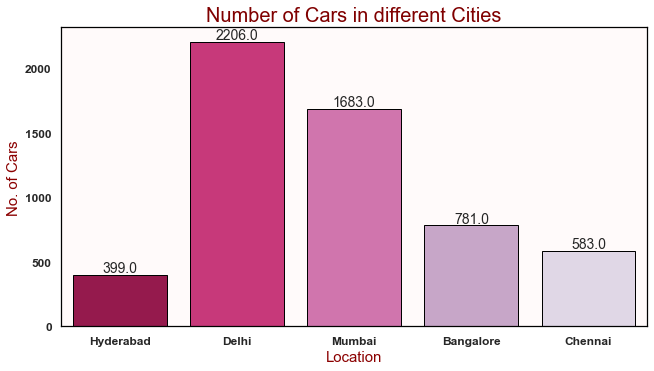

In [43]:
sns.set(rc={'figure.figsize':(10.5,5.5)})
a = sns.countplot(x = 'Location',data=df,edgecolor='black',palette='PuRd_r')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14)
a.set_xlabel("Location", fontsize = 15,color='darkred')
a.set_ylabel("No. of Cars", fontsize =15, color='darkred')
plt.title("Number of Cars in different Cities",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.set_facecolor('snow')
plt.grid(False)

## 2) Percentage of cars available for sale in different cities

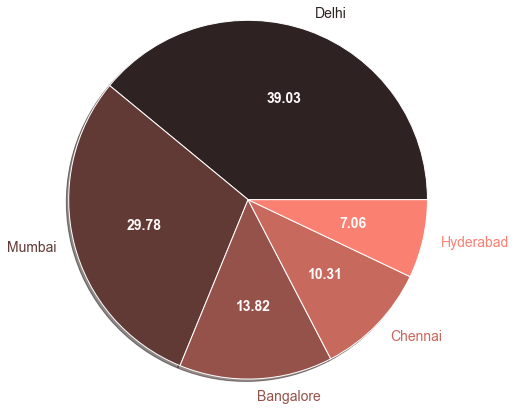

In [44]:
count = df['Location'].value_counts()
count = count.reset_index().rename(columns={'Location':'Count','index':'Location'})
colors = sns.set_palette('dark:salmon',5)
patches,text, pcts= plt.pie(x='Count',labels='Location',autopct='%.2f',data=count,colors=colors,radius=1.5,shadow=True,
                    textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()


## 3) No. of different Brands in all Cities

In [45]:
brand_count = df['Car Brand'].value_counts().sort_values(ascending=False).reset_index().rename(
    columns = {'index':'Brand','Car Brand':'Count'})

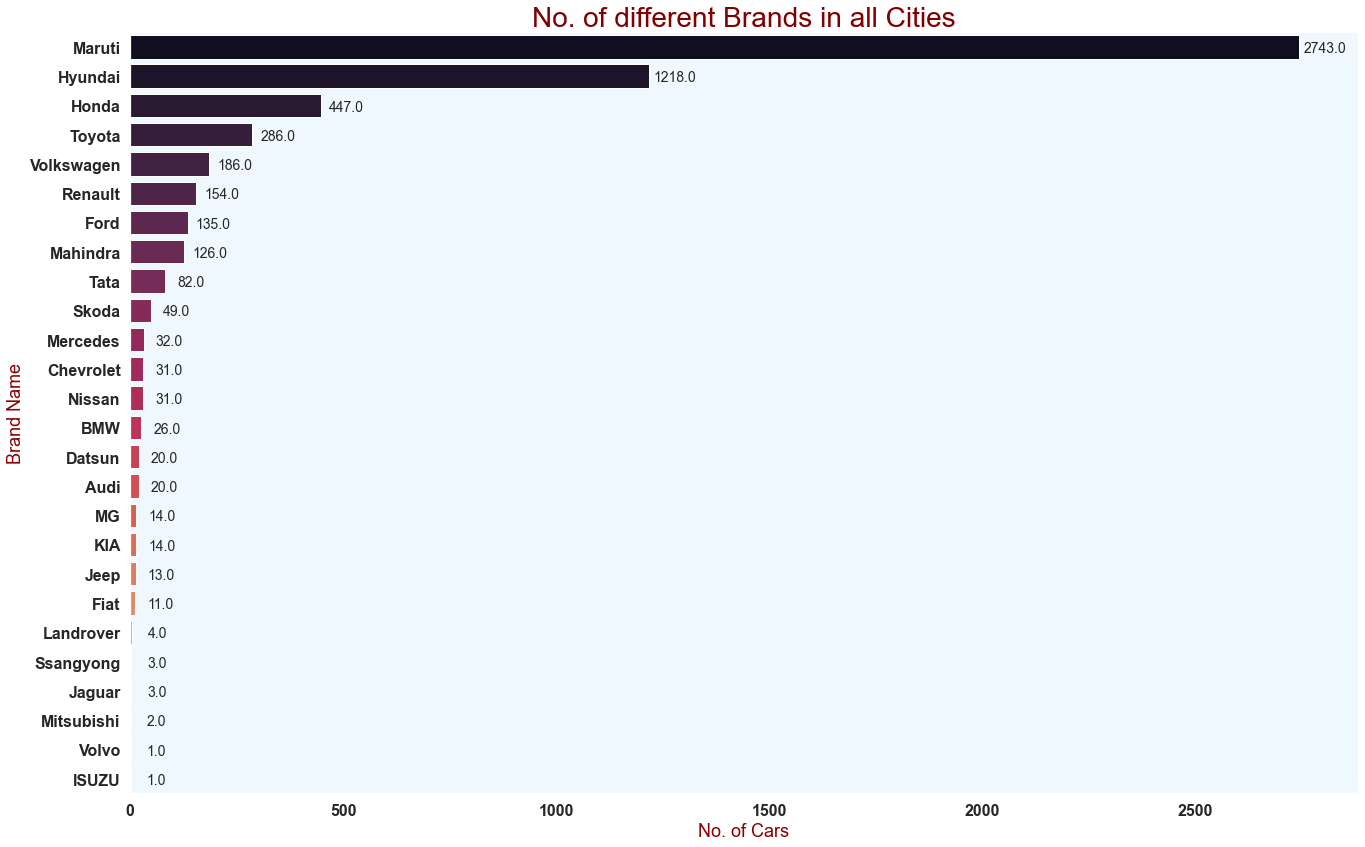

In [46]:
sns.set(rc={'figure.figsize':(22,14)})
a = sns.barplot(y ='Brand',x='Count',data=brand_count,palette='rocket')
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(60+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("No. of Cars", fontsize = 18,color='darkred')
a.set_ylabel("Brand Name", fontsize =18, color='darkred')
plt.title("No. of different Brands in all Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.grid(False)

In [47]:
plt.savefig("2.jpg", bbox_inches="tight", pad_inches=1, transparent=True)

<Figure size 1584x1008 with 0 Axes>

##  4) Average Price of all the brands

In [48]:
avg_price = df.groupby(by=['Car Brand'])['Price'].mean().sort_values(ascending=False).reset_index().rename(
    columns={'Price':'Avg Price'})
avg_price['Avg Price'] = avg_price['Avg Price'].astype(int)

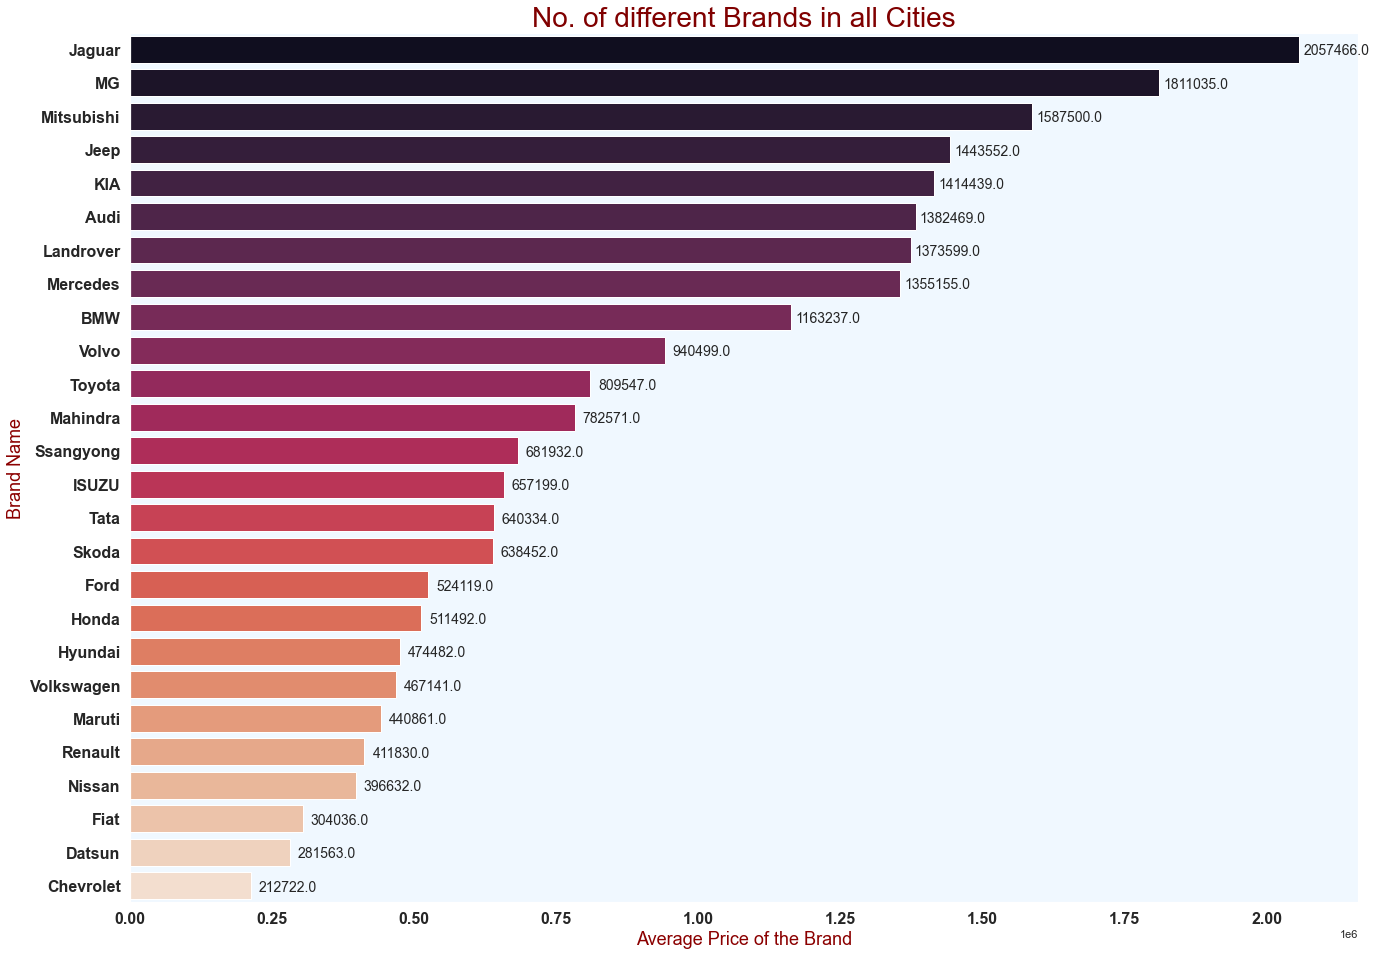

In [49]:
sns.set(rc={'figure.figsize':(22,16)})
a = sns.barplot(y ='Car Brand',x='Avg Price',data=avg_price,palette='rocket')
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(65000+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Average Price of the Brand", fontsize = 18,color='darkred')
a.set_ylabel("Brand Name", fontsize =18, color='darkred')
plt.title("No. of different Brands in all Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.grid(False)

## 5) Total no. of different Car Brands in Hyderabad

In [50]:
hyd_city = df.loc[(df['Location'] == 'Hyderabad')]
hyd_brands = hyd_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

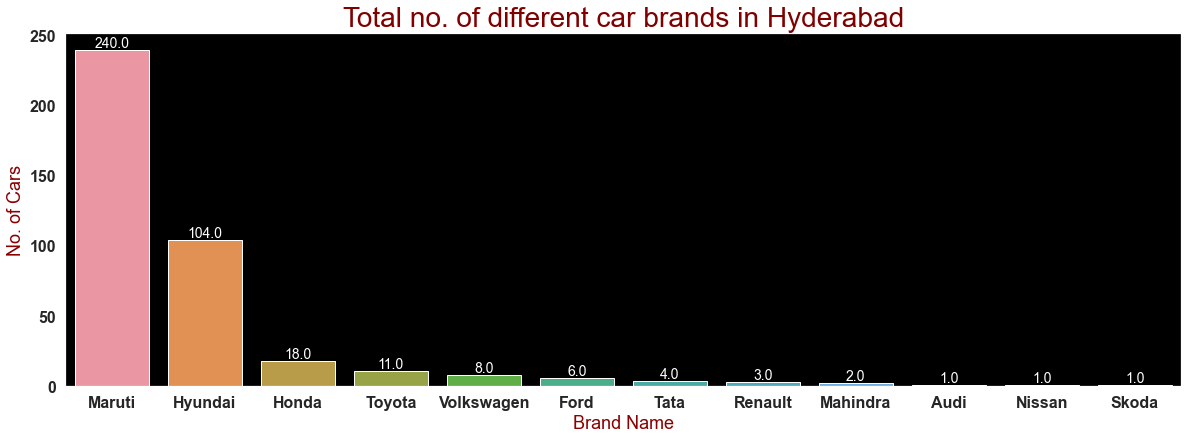

In [51]:
sns.set(rc={'figure.figsize':(20,6.5)})
a = sns.barplot(x ='Brand',y='Count',data=hyd_brands)
plt.xticks(rotation=0,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Hyderabad",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

## 6) Total no. of different Car Brands in Delhi

In [52]:
delhi_city = df.loc[(df['Location'] == 'Delhi')]
delhi_brands = delhi_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

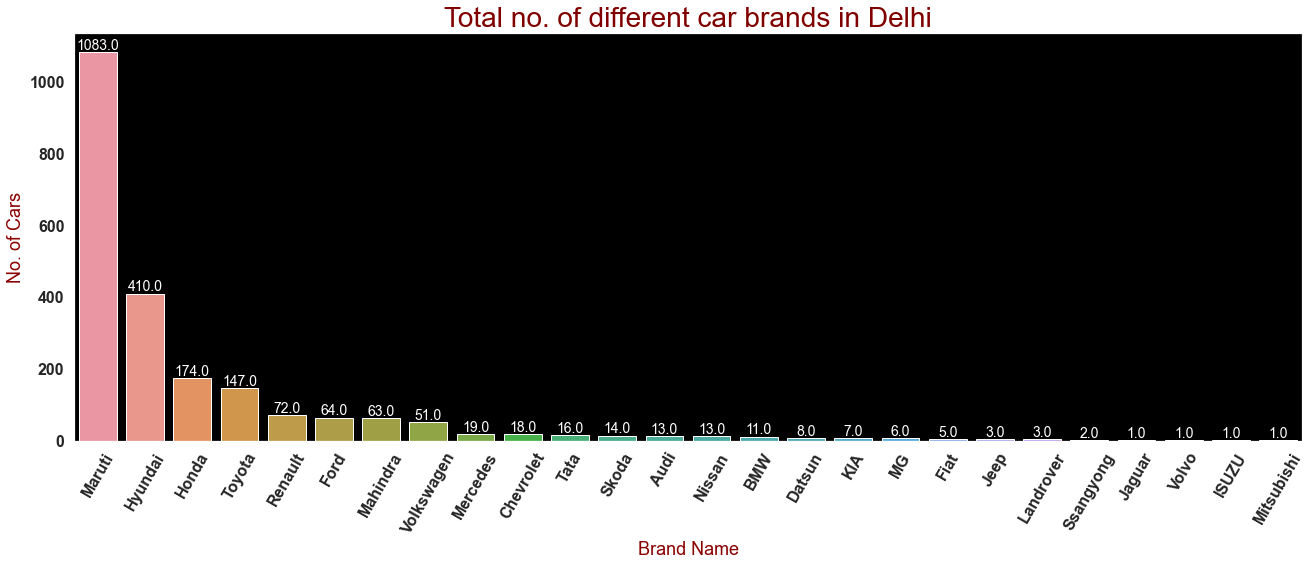

In [53]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=delhi_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Delhi",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

## 7) Total no. of different Car Brands in Mumbai

In [54]:
mumbai_city = df.loc[(df['Location'] == 'Mumbai')]
mumbai_brands = mumbai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

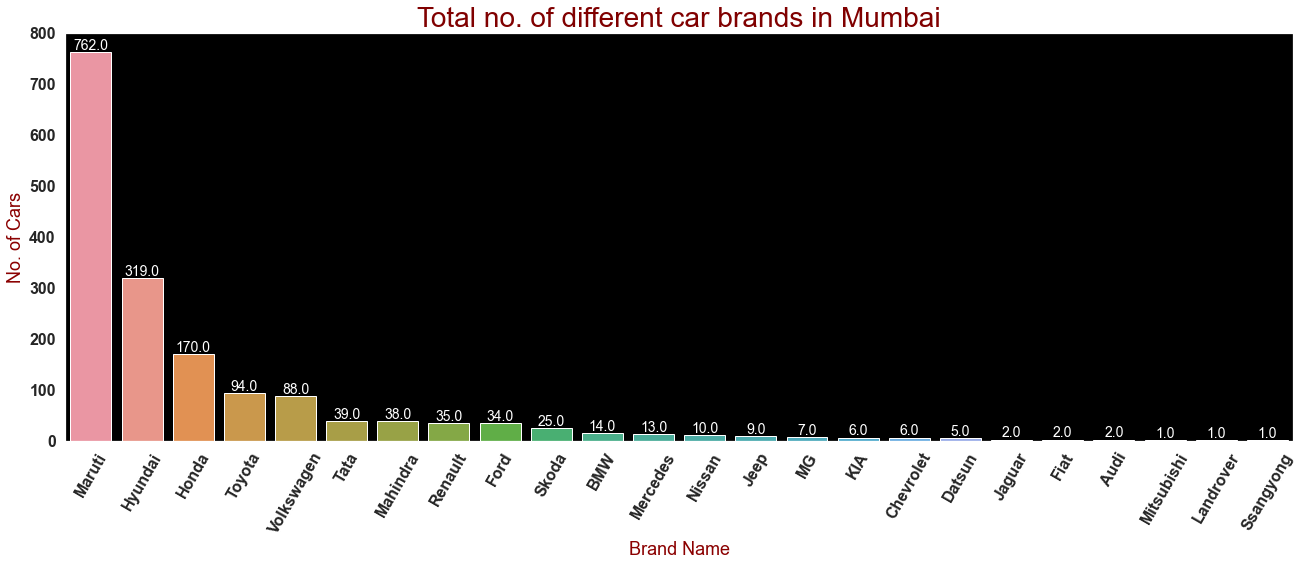

In [55]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=mumbai_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Mumbai",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

## 8) Total no. of different Car Brands in Bangalore

In [56]:
bangalore_city = df.loc[(df['Location'] == 'Bangalore')]
bangalore_brands = bangalore_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

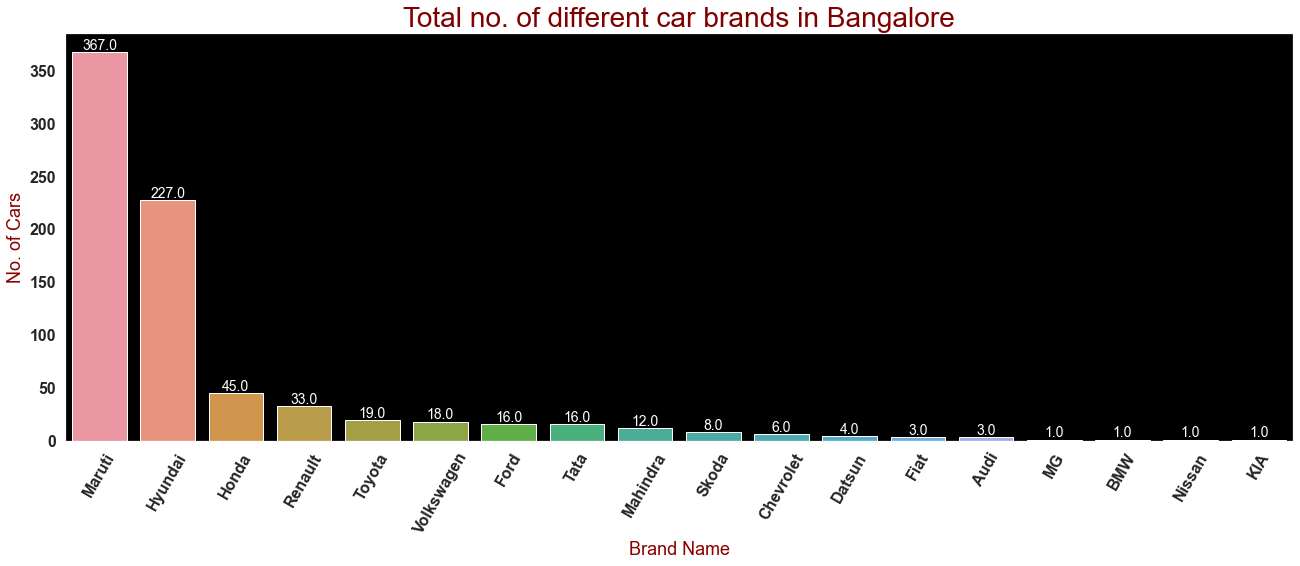

In [57]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=bangalore_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Bangalore",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

## 9) Total no. of different Car Brands in Chennai

In [58]:
chennai_city = df.loc[(df['Location'] == 'Chennai')]
chennai_brands = chennai_city['Car Brand'].value_counts().sort_values(ascending = False).reset_index().rename(columns={
    'Car Brand':'Count','index':'Brand'})

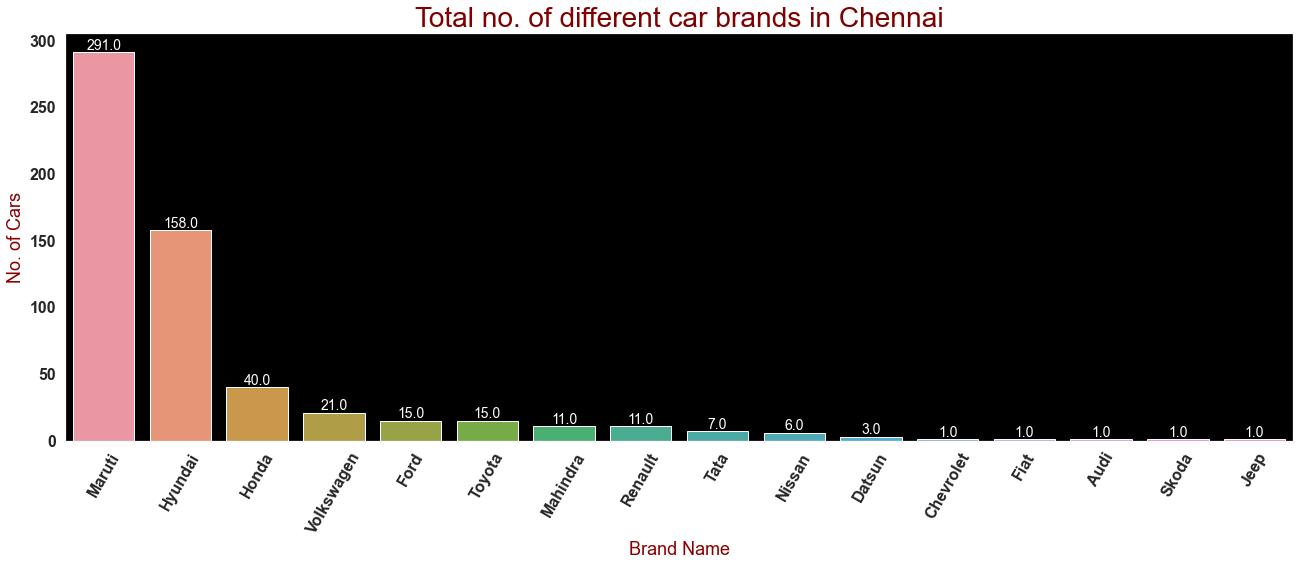

In [59]:
sns.set(rc={'figure.figsize':(22,7.5)})
a = sns.barplot(x ='Brand',y='Count',data=chennai_brands)
plt.xticks(rotation=60,fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=14,color='white')
a.set_xlabel("Brand Name", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("Total no. of different car brands in Chennai",fontsize=28,color='maroon')
a.set_facecolor('black')
plt.grid(False)

## 10) Number of Cars based on Fuel type in all cities

In [60]:
fuel_gear = df.groupby(by=['Fuel'])['Location'].count().sort_values(ascending=True).reset_index().rename(
    columns={'Location':'Count'})
fuel_gear

,Fuel,Count
0,Electric,2
1,Petrol + LPG,17
2,Petrol + CNG,146
3,Diesel,1876
4,Petrol,3611


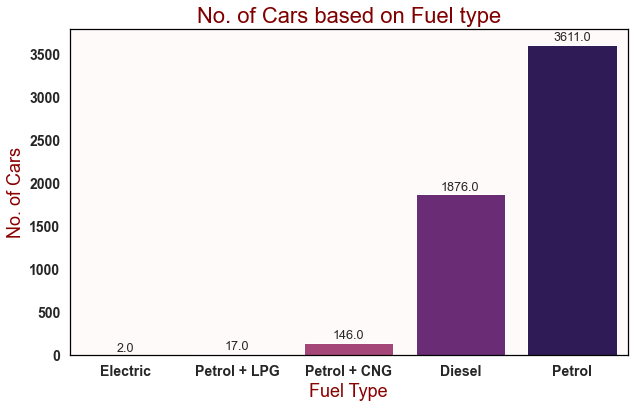

In [61]:
sns.set(rc={'figure.figsize':(10,6)})
a = sns.barplot(x ='Fuel',y='Count',data=fuel_gear,palette='magma_r')
plt.xticks(rotation=0,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=12.6)
a.set_xlabel("Fuel Type", fontsize = 18,color='darkred')
a.set_ylabel("No. of Cars", fontsize =18, color='darkred')
plt.title("No. of Cars based on Fuel type",fontsize=22,color='maroon')
a.set_facecolor('snow')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

## 11) No. of Cars based on Fuel type in different Cities

In [62]:
fuel_location = df.groupby(by=['Location','Fuel'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Fuel'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)
fuel_location

,Location,Fuel,Count
0,Bangalore,Petrol + CNG,1
1,Bangalore,Electric,2
2,Bangalore,Petrol + LPG,6
3,Bangalore,Diesel,127
4,Bangalore,Petrol,645
5,Chennai,Petrol + LPG,4
6,Chennai,Diesel,116
7,Chennai,Petrol,463
8,Delhi,Petrol + CNG,78
9,Delhi,Diesel,976


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


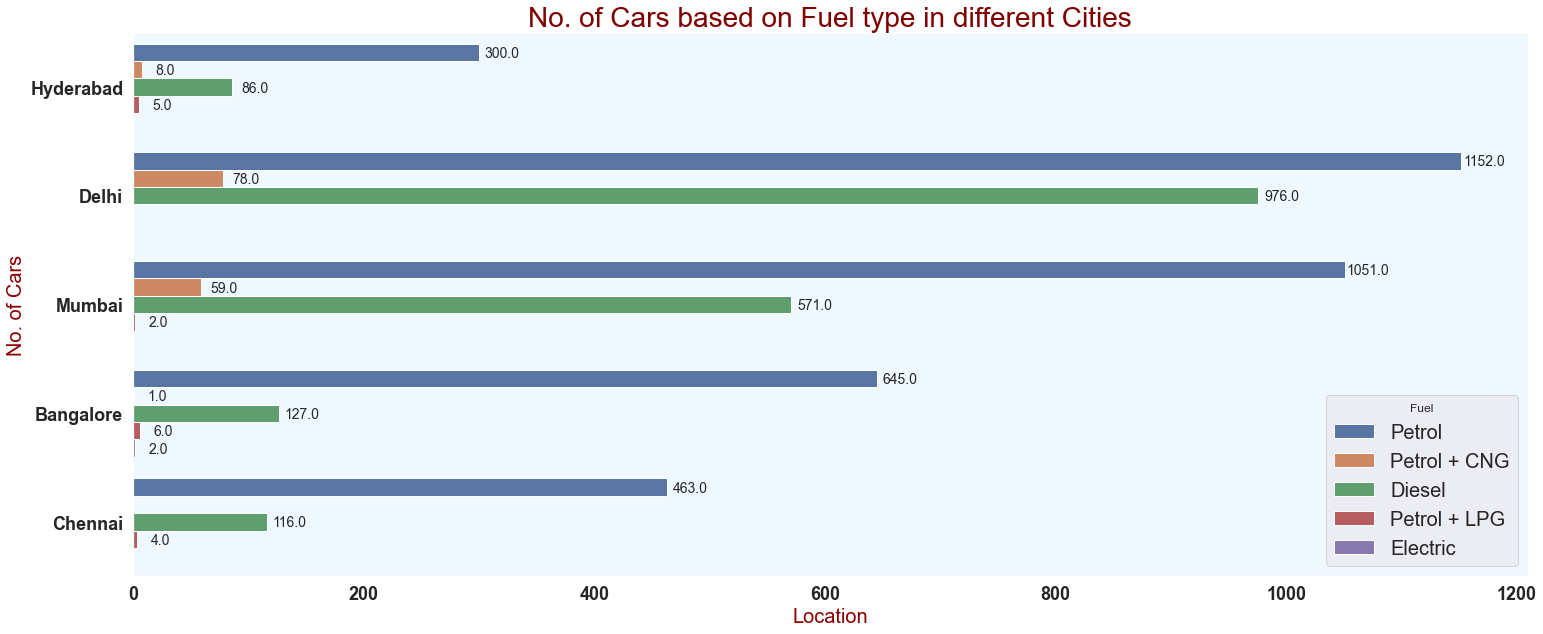

In [63]:
sns.set(rc={'figure.figsize':(25,10)})
a = sns.countplot(y = 'Location',hue='Fuel',data=df)
plt.xticks(rotation=0,fontsize=18,fontweight='bold')
plt.yticks(fontsize=18,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(20+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14)
a.set_xlabel("Location", fontsize = 20,color='darkred')
a.set_ylabel("No. of Cars", fontsize =20, color='darkred')
plt.title("No. of Cars based on Fuel type in different Cities",fontsize=28,color='maroon')
a.set_facecolor('aliceblue')
plt.legend(loc='lower right',title='Fuel',prop={'size': 20})
a.grid(False)

## 12) No. of cars in different Cities based on Model Year

In [64]:
fuel_location = df.groupby(by=['Location','Model Year'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count','Count':'Model Year'})
fuel_location = fuel_location.sort_values(by=['Location','Count'],ascending=True).reset_index()
fuel_location = fuel_location.drop('index',axis=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


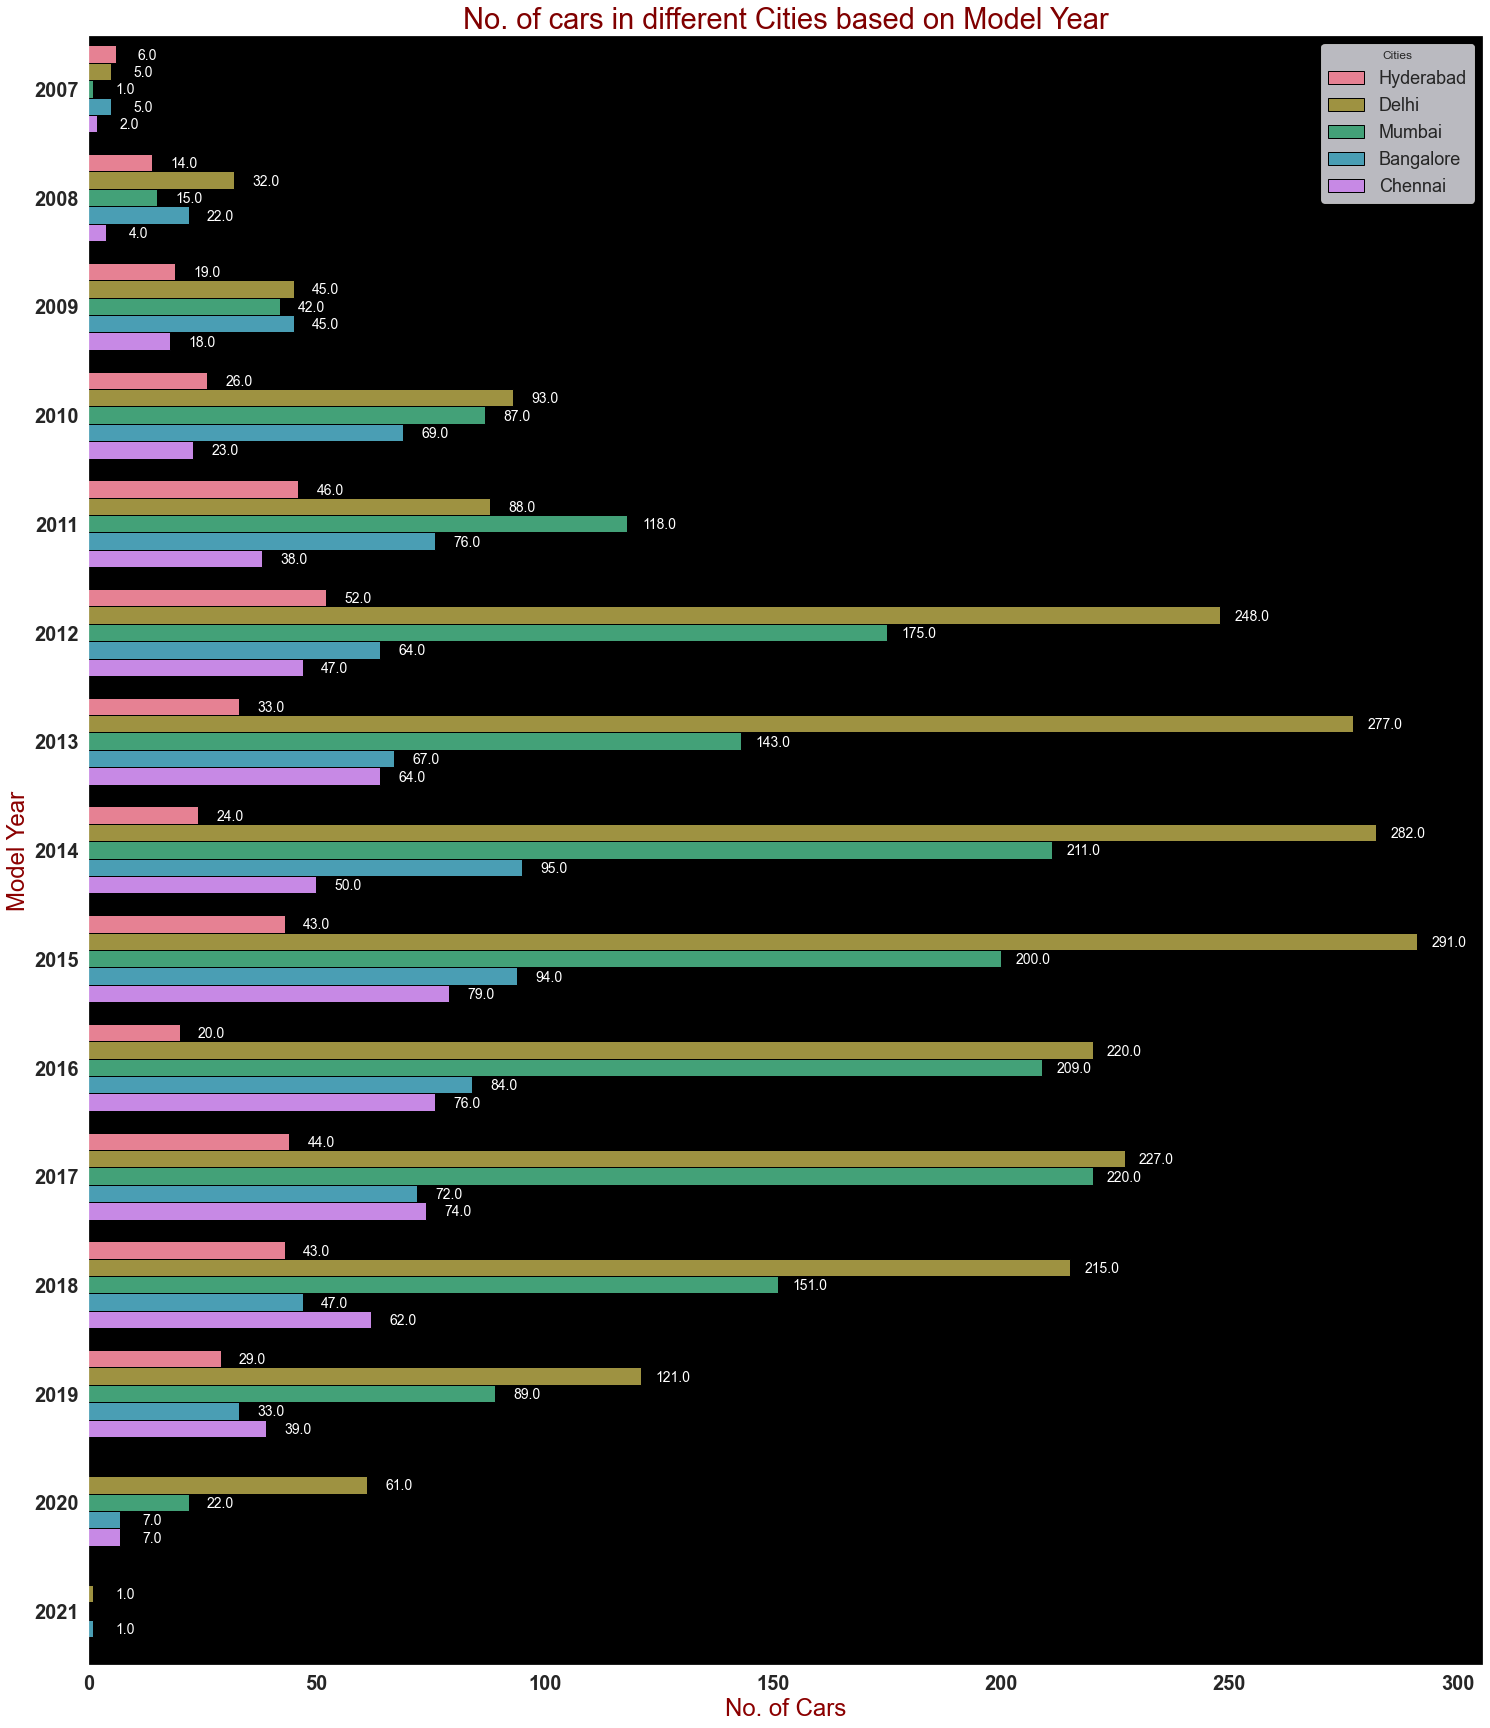

In [65]:
sns.set(rc={'figure.figsize':(25,30)})
a = sns.countplot(y = 'Model Year',hue='Location',data=df,edgecolor='black',palette='husl')
plt.xticks(rotation=0,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
for p in a.patches:
    width = p.get_width()
    plt.text(7+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',va='center',fontsize=14,
            color='white')
a.set_ylabel("Model Year", fontsize = 24,color='darkred')
a.set_xlabel("No. of Cars", fontsize =24, color='darkred')
plt.title("No. of cars in different Cities based on Model Year",fontsize=29,color='maroon')
a.set_facecolor('black')
plt.legend(loc='upper right',title='Cities',prop={'size': 18})
a.grid(False)

## 13) No. of Cars in different cities based on Gear

In [66]:
location_gear = df.groupby(by=['Location','Gear'])['Ownership'].count().reset_index().rename(
    columns={'Ownership':'Count'})
location_gear

,Location,Gear,Count
0,Bangalore,Automatic,68
1,Bangalore,Manual,713
2,Chennai,Automatic,54
3,Chennai,Manual,529
4,Delhi,Automatic,179
5,Delhi,Manual,2027
6,Hyderabad,Automatic,21
7,Hyderabad,Manual,378
8,Mumbai,Automatic,256
9,Mumbai,Manual,1427


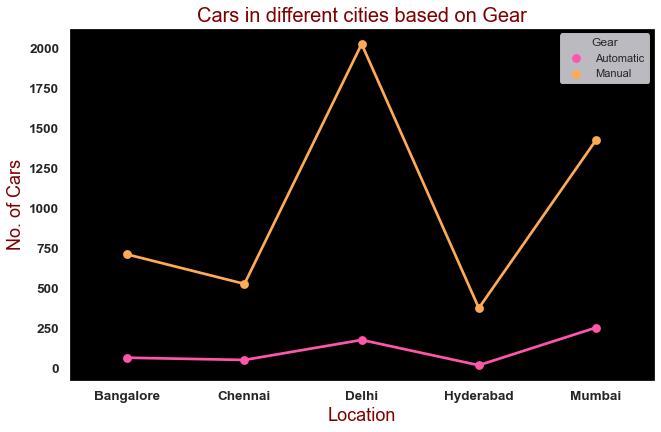

In [67]:
sns.set(rc={'figure.figsize':(10.5,6.5)})
plt.xticks(rotation=0,fontsize=13.5,fontweight='bold')
plt.yticks(fontsize=13.5,fontweight='bold')
a = sns.pointplot(x='Location',y='Count',hue='Gear',data=location_gear,palette='spring')
a.set_facecolor('black')
a.set_xlabel("Location", fontsize = 18,color='maroon')
a.set_ylabel("No. of Cars", fontsize =18, color='maroon')
plt.title("Cars in different cities based on Gear",fontsize=20,color='maroon')
plt.grid(False)

## 14) No. of Cars in different cities based on Ownership

In [68]:
location_owner = df.groupby(by=['Location','Ownership'])['Gear'].count().reset_index().rename(
    columns={'Gear':'Count'})
location_owner

,Location,Ownership,Count
0,Bangalore,1,545
1,Bangalore,2,197
2,Bangalore,3,38
3,Bangalore,4,1
4,Chennai,1,421
5,Chennai,2,140
6,Chennai,3,20
7,Chennai,4,2
8,Delhi,1,1725
9,Delhi,2,415


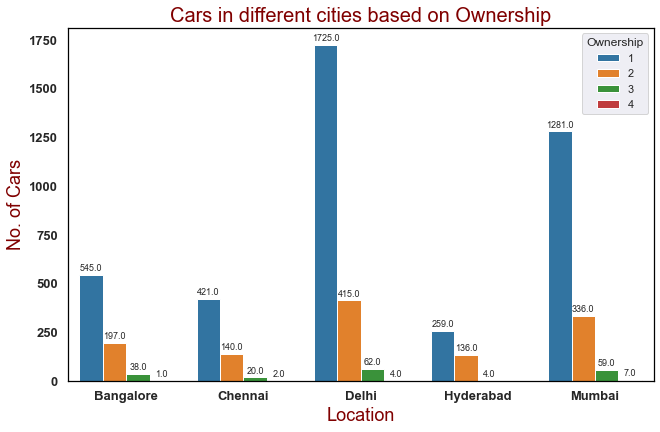

In [69]:
a = sns.barplot(x='Location',y='Count',data=location_owner,hue='Ownership',palette='tab10')
for p in a.patches:
    a.annotate(format(p.get_height(),'.1f'),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
              va='center',xytext=(0,6.5),textcoords='offset points',fontsize=9)
a.set_facecolor('white')
a.set_xlabel("Location", fontsize = 18,color='maroon')
a.set_ylabel("No. of Cars", fontsize =18, color='maroon')
plt.title("Cars in different cities based on Ownership",fontsize=20,color='maroon')
plt.xticks(rotation=0,fontsize=13,fontweight='bold')
plt.yticks(fontsize=13,fontweight='bold')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
a.grid(False)

In [70]:
df['Car Brand'].unique()

array(['Hyundai', 'Maruti', 'Tata', 'Honda', 'Renault', 'Volkswagen',
       'Ford', 'Toyota', 'Mahindra', 'Nissan', 'Skoda', 'Audi',
       'Chevrolet', 'KIA', 'MG', 'Datsun', 'Volvo', 'Mercedes', 'Fiat',
       'BMW', 'ISUZU', 'Ssangyong', 'Mitsubishi', 'Landrover', 'Jeep',
       'Jaguar'], dtype=object)

## 15) Average Price, EMI, Driven(Kms) based on Fuel type in Bangalore

In [71]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
bangalore = models[models['Location']=='Bangalore']
bangalore

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
0,Bangalore,Diesel,743246,2014,75446,1,16533
1,Bangalore,Electric,259199,2014,64366,1,5766
2,Bangalore,Petrol,441726,2013,48168,1,9825
3,Bangalore,Petrol + CNG,356699,2016,57073,2,7935
4,Bangalore,Petrol + LPG,249499,2009,70007,1,5550


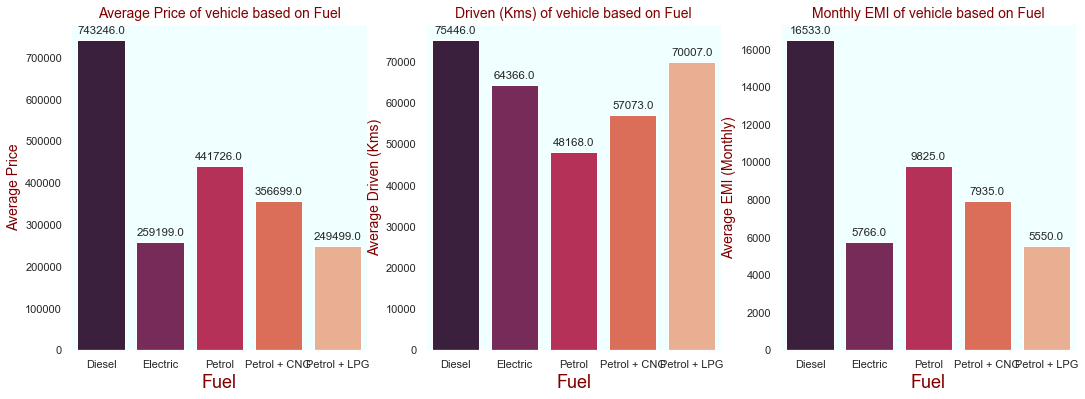

In [72]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=bangalore,palette='rocket',ax =axes[0])
a.set_facecolor('azure')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=bangalore,palette='rocket',ax =axes[1])
b.set_facecolor('azure')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=bangalore,palette='rocket',ax =axes[2])
c.set_facecolor('azure')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
a.grid(False)
b.grid(False)
c.grid(False)

## 16) Average Price, EMI, Driven(Kms) based on Fuel type in Chennai

In [73]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
chennai = models[models['Location']=='Chennai']
chennai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
5,Chennai,Diesel,630629,2014,88197,1,14028
6,Chennai,Petrol,425408,2014,50216,1,9462
7,Chennai,Petrol + LPG,198949,2009,67483,2,4425


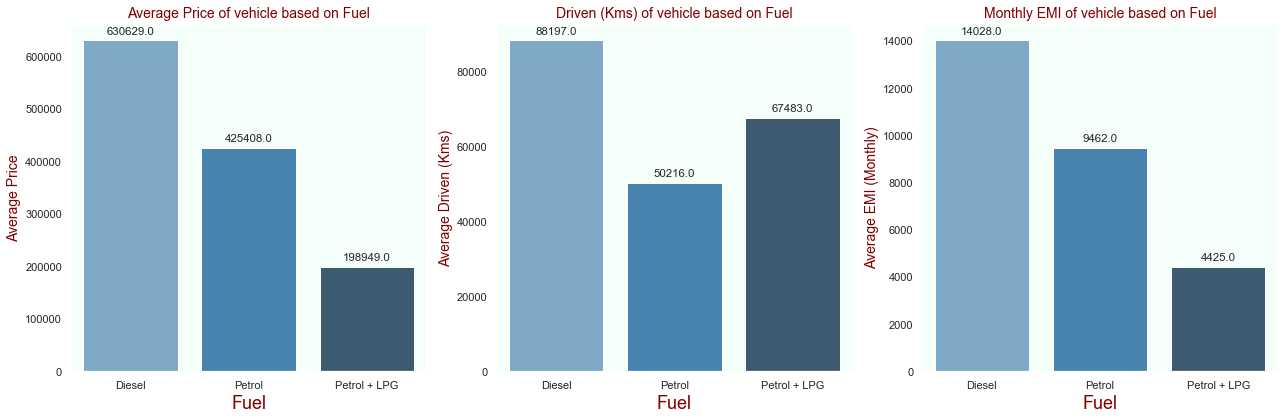

In [74]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=chennai,palette='Blues_d',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=chennai,palette='Blues_d',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=chennai,palette='Blues_d',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 17) Average Price, EMI, Driven(Kms) based on Fuel type in Delhi

In [75]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
delhi = models[models['Location']=='Delhi']
delhi

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
8,Delhi,Diesel,592187,2014,84902,1,13172
9,Delhi,Petrol,423003,2014,50559,1,9409
10,Delhi,Petrol + CNG,353587,2014,68317,1,7865


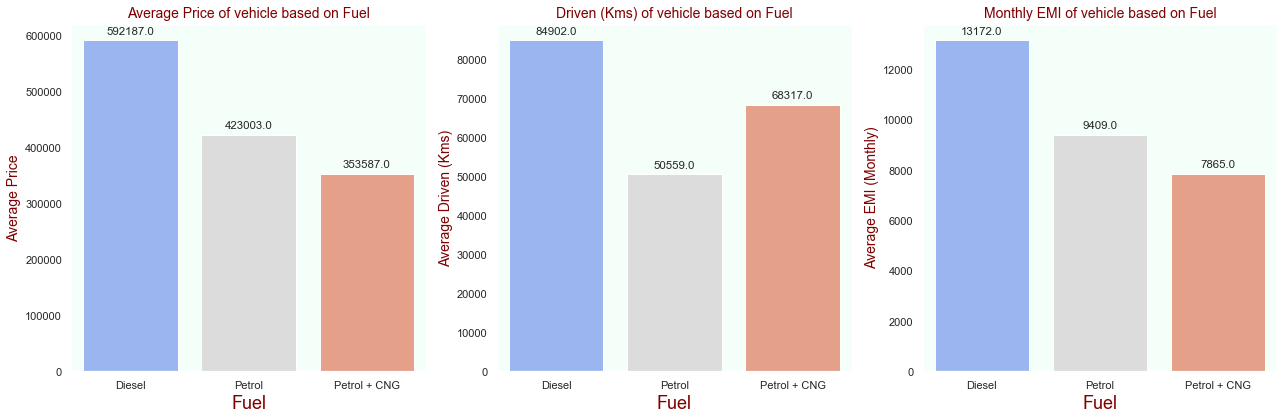

In [76]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=delhi,palette='coolwarm',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=delhi,palette='coolwarm',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=delhi,palette='coolwarm',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 18) Average Price, EMI, Driven(Kms) based on Fuel type in Hyderabad

In [77]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
hyderabad = models[models['Location']=='Hyderabad']
hyderabad

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
11,Hyderabad,Diesel,700956,2015,92104,1,15592
12,Hyderabad,Petrol,378409,2013,56889,1,8417
13,Hyderabad,Petrol + CNG,278236,2011,75135,1,6189
14,Hyderabad,Petrol + LPG,208159,2009,124219,1,4630


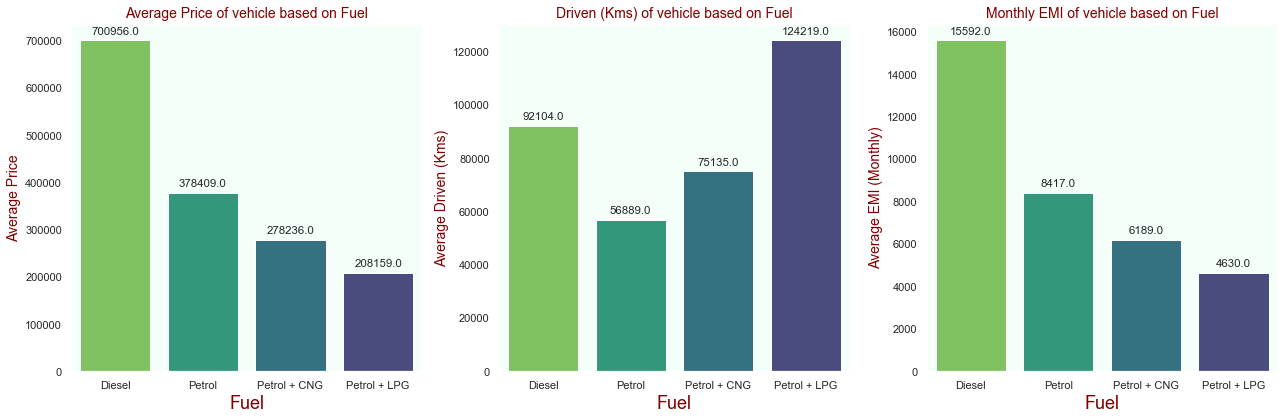

In [78]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=hyderabad,palette='viridis_r',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=hyderabad,palette='viridis_r',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=hyderabad,palette='viridis_r',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 19) Average Price, EMI, Driven(Kms) based on Fuel type in Mumbai

In [79]:
models = df.groupby(by=['Location','Fuel']).mean()
models = models.astype(int)
models = models.reset_index()
mumbai = models[models['Location']=='Mumbai']
mumbai

,Location,Fuel,Price,Model Year,Driven (Kms),Ownership,EMI (monthly)
15,Mumbai,Diesel,726681,2014,86409,1,16164
16,Mumbai,Petrol,476289,2014,44260,1,10594
17,Mumbai,Petrol + CNG,406618,2014,67334,1,9045
18,Mumbai,Petrol + LPG,171949,2010,99602,2,3825


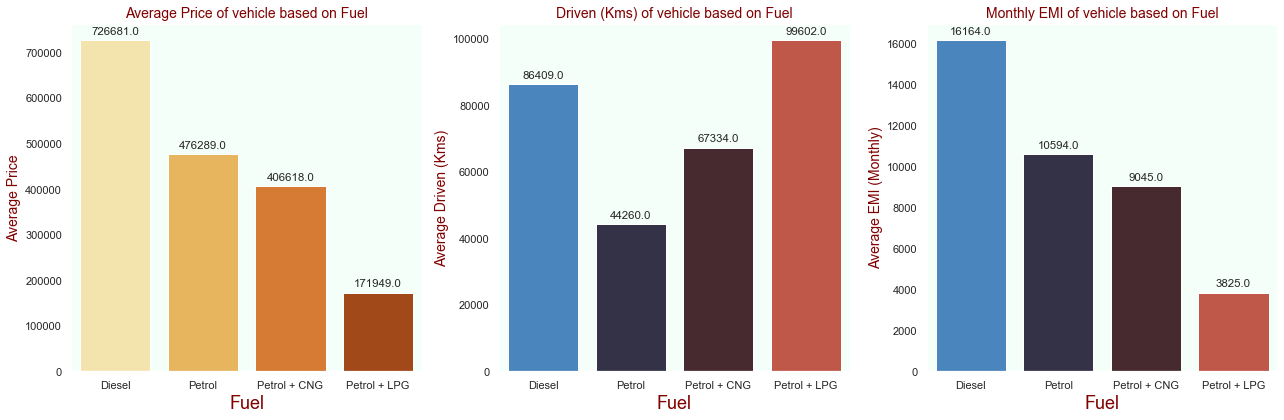

In [80]:
f, axes = plt.subplots(1, 3, figsize=(18,6))
#1st plot
a = sns.barplot(x='Fuel',y='Price',data=mumbai,palette='YlOrBr',ax =axes[0])
a.set_facecolor('mintcream')
a.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
a.set_ylabel("Average Price", fontsize =14, color='maroon')
a.set_title("Average Price of vehicle based on Fuel", fontsize =14, color='maroon')
#2nd plot
b = sns.barplot(x='Fuel',y='Driven (Kms)',data=mumbai,palette='icefire',ax =axes[1])
b.set_facecolor('mintcream')
b.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in b.patches:
    b.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
b.set_ylabel("Average Driven (Kms)", fontsize =14, color='maroon')
b.set_title("Driven (Kms) of vehicle based on Fuel", fontsize =14, color='maroon')
#3rd plot
c = sns.barplot(x='Fuel',y='EMI (monthly)',data=mumbai,palette='icefire',ax =axes[2])
c.set_facecolor('mintcream')
c.set_xlabel("Fuel", fontsize = 18,color='maroon')
for p in c.patches:
    c.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=11.5)
c.set_ylabel("Average EMI (Monthly)", fontsize =14, color='maroon')
c.set_title("Monthly EMI of vehicle based on Fuel", fontsize =14, color='maroon')
plt.tight_layout()
a.grid(False)
b.grid(False)
c.grid(False)

## 20) Car with highest & lowest price in Hyderabad

In [81]:
by_model = df.groupby(by=['Location','Car Brand','Model']).median()
by_model = by_model.reset_index()
model_h = by_model[by_model["Location"]=='Hyderabad'].sort_values('Price',ascending=False)

In [82]:
def max_min(column):
    high = model_h[column].idxmax()
    high_model = pd.DataFrame(model_h.loc[high])
    low = model_h[column].idxmin()
    low_model = pd.DataFrame(model_h.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1196,1102
Location,Hyderabad,Hyderabad
Car Brand,Toyota,Hyundai
Model,Innova Crysta2.4 VX 8 STR,Santro XingXO ERLX EURO III
Price,1801049.0,165299.0
Model Year,2018.0,2007.0
Driven (Kms),115695.5,62325.5
Ownership,1.0,1.5
EMI (monthly),40063.5,3677.0


## 21) Car with highest & lowest price in Delhi

In [83]:
model_d = by_model[by_model["Location"]=='Delhi'].sort_values('Price',ascending=False)

In [84]:
def max_min(column):
    high = model_d[column].idxmax()
    high_model = pd.DataFrame(model_d.loc[high])
    low = model_d[column].idxmin()
    low_model = pd.DataFrame(model_d.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1018,526
Location,Delhi,Delhi
Car Brand,Toyota,Chevrolet
Model,Fortuner2.8 4x2 AT,SparkLS 1.0
Price,2724199.0,108500.0
Model Year,2018.0,2010.5
Driven (Kms),25870.0,42091.5
Ownership,4.0,1.0
EMI (monthly),60598.0,2413.5


## 22) Car with highest & lowest price in Mumbai

In [85]:
model_m = by_model[by_model["Location"]=='Mumbai'].sort_values('Price',ascending=False)

In [86]:
def max_min(column):
    high = model_m[column].idxmax()
    high_model = pd.DataFrame(model_m.loc[high])
    low = model_m[column].idxmin()
    low_model = pd.DataFrame(model_m.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,1715,1674
Location,Mumbai,Mumbai
Car Brand,Toyota,Tata
Model,Land CruiserLC200 VX 2 PREMIUM,NanoXT TWIST
Price,3495000.0,117500.0
Model Year,2010.0,2014.0
Driven (Kms),125306.0,66925.5
Ownership,2.0,1.0
EMI (monthly),77744.0,2614.0


## 23) Car with highest & lowest price in Bangalore

In [87]:
model_b = by_model[by_model["Location"]=='Bangalore'].sort_values('Price',ascending=False)

In [88]:
def max_min(column):
    high = model_b[column].idxmax()
    high_model = pd.DataFrame(model_b.loc[high])
    low = model_b[column].idxmin()
    low_model = pd.DataFrame(model_b.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,259,6
Location,Bangalore,Bangalore
Car Brand,Toyota,Chevrolet
Model,Fortuner2.8 4x2 MT,SparkLS 1.0
Price,2976299.0,189499.0
Model Year,2018.0,2009.0
Driven (Kms),35464.0,20028.0
Ownership,1.0,1.0
EMI (monthly),66206.0,4215.0


## 24) Car with highest & lowest price in Chennai

In [89]:
model_c = by_model[by_model["Location"]=='Chennai'].sort_values('Price',ascending=False)

In [90]:
def max_min(column):
    high = model_c[column].idxmax()
    high_model = pd.DataFrame(model_c.loc[high])
    low = model_c[column].idxmin()
    low_model = pd.DataFrame(model_c.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,478,389
Location,Chennai,Chennai
Car Brand,Tata,Maruti
Model,HexaVaricor 400 XT,A StarZXI
Price,1801499.0,181099.0
Model Year,2019.0,2009.0
Driven (Kms),46337.0,82747.0
Ownership,1.0,3.0
EMI (monthly),40073.0,4028.0


## 25) High budget & Low budger car among all cities

In [91]:
price = df.sort_values(by='Price',ascending=False)

In [92]:
def max_min(column):
    high = price[column].idxmax()
    high_model = pd.DataFrame(price.loc[high])
    low = price[column].idxmin()
    low_model = pd.DataFrame(price.loc[low])
    high_low = pd.concat([high_model,low_model],axis=1)
    return high_low
max_min('Price')

,3376,1876
Car Brand,Toyota,Maruti
Model,Land CruiserLC200 VX 2 PREMIUM,AltoLX
Price,3495000,91000
Model Year,2010,2008
Location,Mumbai,Delhi
Fuel,Diesel,Petrol
Driven (Kms),125306,68064
Gear,Manual,Manual
Ownership,2,1
EMI (monthly),77744,2024


## 26) Comparision of car brand count in different Cities

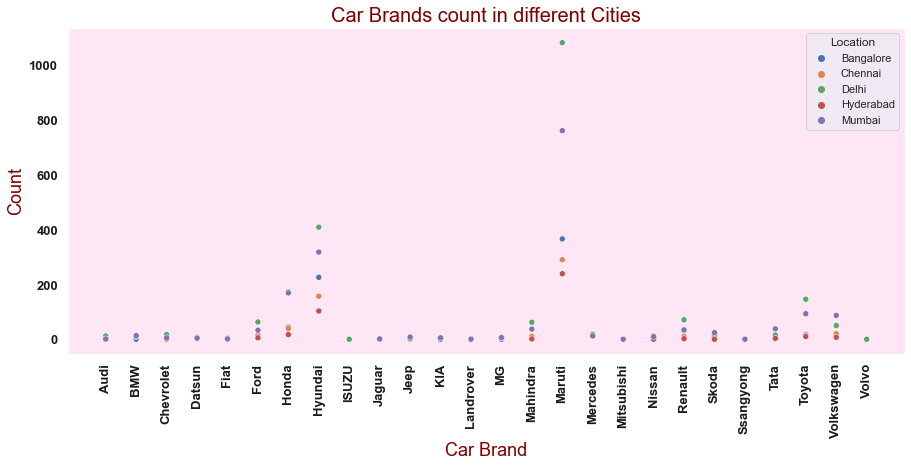

In [93]:
by_model = df.groupby(by=['Car Brand','Location'])['Price'].count().reset_index().rename(
    columns={'Price':'Count'})
sns.set(rc={'figure.figsize':(15,6)})
a = sns.scatterplot(y='Count',x='Car Brand',hue='Location',data=by_model)

a.set_ylabel("Count", fontsize = 18,color='maroon')
a.set_xlabel("Car Brand", fontsize =18, color='maroon')
a.set_title("Car Brands count in different Cities", fontsize =20, color='maroon')
a.set_facecolor('#FFE6F5')
plt.xticks(rotation = 90,fontsize=13,color='k',fontweight='bold')
plt.yticks(fontsize=13,color='k',fontweight='bold')
a.grid(False)
plt.show()

## 27) Car Brand vs Average Price

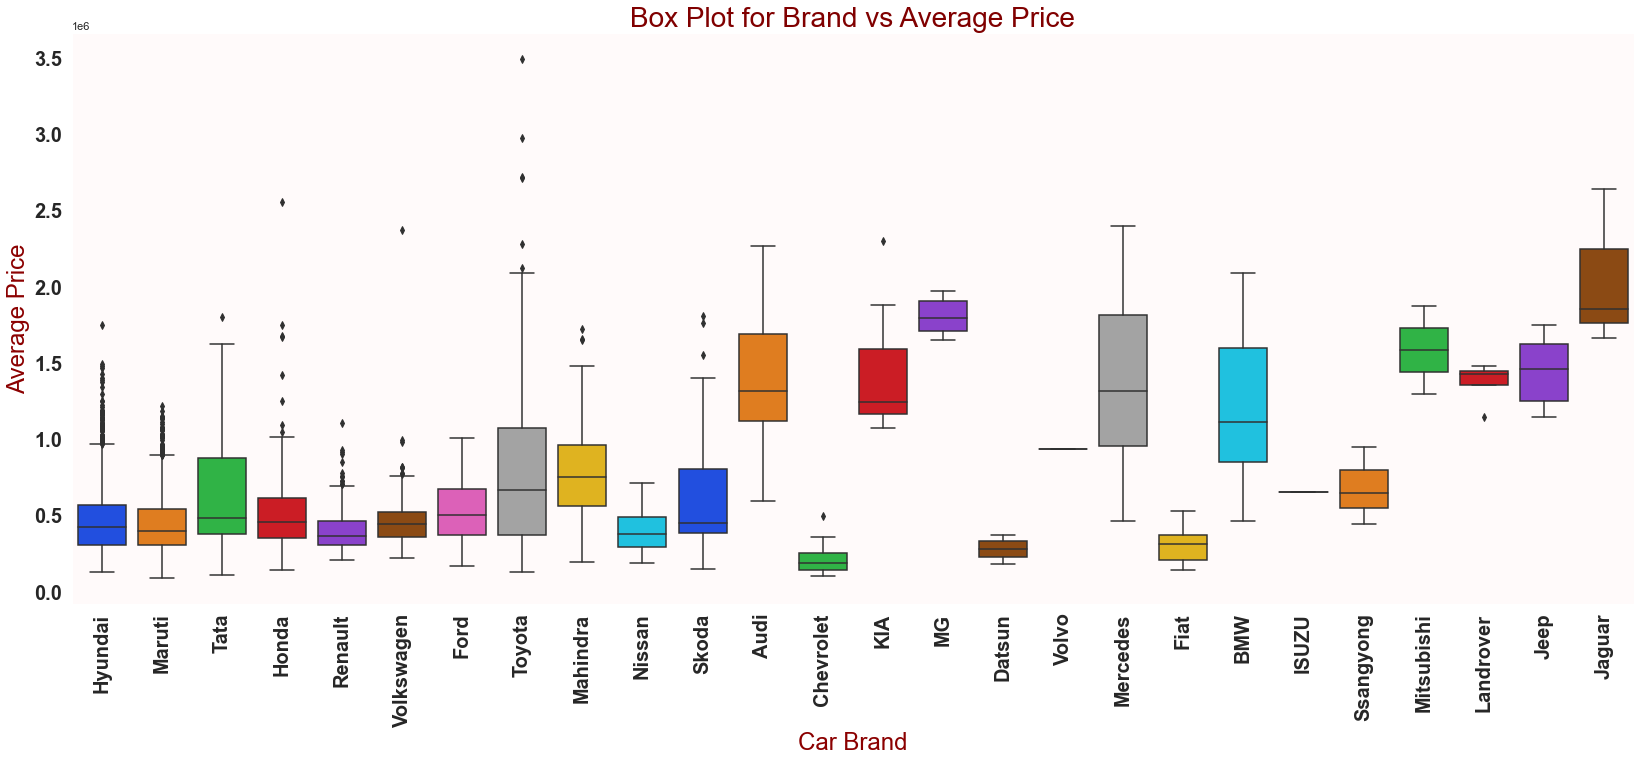

In [94]:
sns.set(rc={'figure.figsize':(28,10.5)})
a = sns.boxplot(x='Car Brand',y='Price',data=df,palette='bright')
a.set_xlabel("Car Brand", fontsize = 24,color='darkred')
a.set_ylabel("Average Price", fontsize =24, color='darkred')
plt.xticks(rotation=90,fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
a.set_title("Box Plot for Brand vs Average Price", fontsize =28, color='maroon')
a.set_facecolor('snow')
a.grid(False)
plt.show()

## 28) Heat Map for Correlation 

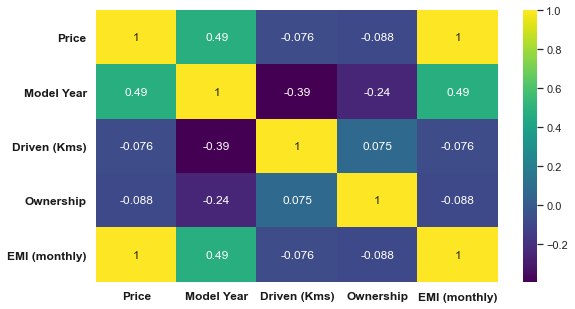

In [95]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

# Conclusion

* The availability of cars  in 'Delhi'(2200+) is the highest among other 4 cities.
* Compared to other 4 cities 'Hyderabad'(415+) has less available cars.
* 'Maruti' brand cars are widely available with a count of around 2800 cars in all the cities, followed by Hyundai(1240+), Honda(449), Toyota(280+)
* Most of the cars runs with 'Petrol' with a count of 3663.
* High budget car among all cities:
    * Toyota Land CruiserLC200 VX 2 PREMIUM (3495000/-), 2010 Model, available in Mumbai
* Low budget car among all cities:
    * Maruti AltoLX (91000/-), 2008 Model, available in Delhi


> Hyderabad City
> * Most available brands - Maruti(248), Hyundai(112), Honda(17), Toyota(11), Volkswagon(9)
> * Cars availability - Petrol(319), Diesel(85), Petrol+CNG(9), Petrol+LPG(4)
> * Recent year models availability - 2016(21), 2017(47), 2018(43), 2019(30), 2020(3)
> * Availability based on Gear - Automatic(25), Manual(392)
> * High Budget car - Toyota Innova Crysta2.4 VX 8 STR (1801049/-), 2018 Model
> * Low Budget car - Hyundai AccentGLE (166099/-), 2008 Model

> Delhi City
> * Most available brands - Maruti(1069), Hyundai(404), Honda(173), Toyota(150), Renault(82)
> * Cars availability - Petrol(1122), Diesel(993), Petrol+CNG(81)
> * Recent year models availability - 2016(216), 2017(217), 2018(210), 2019(122), 2020(61), 2021(2)
> * Availability based on Gear - Automatic(182), Manual(2014)
> * High Budget car - Toyota Fortuner2.8 4x2 AT	(2918399/-), 2018 Model
> * Low Budget car - Cheverlet SparkLS 1.0 (112000/-), 2010 Model

> Mumbai City
> * Most available brands - Maruti(802), Hyundai(331), Honda(176), Toyota(93), Volkswagon(84)
> * Cars availability - Petrol(1083), Diesel(579), Petrol+CNG(71), Petrol+LPG(1)
> * Recent year models availability - 2016(224), 2017(219), 2018(148), 2019(95), 2020(37)
> * Availability based on Gear - Automatic(258), Manual(1476)
> * High Budget car - Toyota Land CruiserLC200 VX 2 PREMIUM	 (3495000/-), 2010 Model
> * Low Budget car - Tata NanoXT TWIST (125000/-), 2014 Model

> Bangalore City
> * Most available brands - Maruti(378), Hyundai(228), Honda(41), Renault(29), Volkswagon(9)
> * Cars availability - Petrol(658), Diesel(116), Petrol+CNG(1), Petrol+LPG(5), Electric(1)
> * Recent year models availability - 2016(77), 2017(71), 2018(54), 2019(37), 2020(7), 2021(1)
> * Availability based on Gear - Automatic(70), Manual(711)
> * High Budget car - MG HECTORSHARP 2.0 DIESEL (1964099/-), 2019 Model
> * Low Budget car - Chevorlet SparkLS 1.0 (189499/-), 2009 Model

> Chennai City
> * Most available brands - Maruti(300), Hyundai(167), Honda(42), Volkswagon(23), Ford(16)
> * Cars availability - Petrol(481), Diesel(124), Petrol+LPG(4)
> * Recent year models availability - 2016(81), 2017(79), 2018(68), 2019(41), 2020(6)
> * Availability based on Gear - Automatic(60), Manual(549)
> * High Budget car - Tata HexaVaricor 400 XT (1801499/-), 2019 Model
> * Low Budget car - ChevorletSparkLS 1.0 (171799/-), 2011 Model

#### The above data in conclusion may change upon time to time because the data in the website is not static.